# HW 4 - Question 3

## Part A

In [1]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

In [2]:
n = 20
m = 100
np.random.seed(1)
A = np.random.normal(0,1, (m, n))
b = np.random.normal(0,1, m)

In [3]:
def func_A(x):
    return np.max([A[i,:] @ x + b[i] for i in range(n)])

def lp_A(x, A, b):
    n = len(x)
    y = cvx.Variable(n)
    imax = np.argmax([A[i] @ x + b[i] for i in range(n)])
    g = A[imax]
    # f = cvx.max([A[i] @ x + b[i] for i in range(n)])
    f = func_A(x)
    obj = cvx.Minimize(f + g.T @ (y - x))
    con = [cvx.norm_inf(y) <= 1]
    prob = cvx.Problem(obj, con)
    prob.solve(solver = cvx.ECOS)
    return y.value, obj.value


iters = 40
eps = 1e-8
x = np.ndarray((iters,n))
f = np.full(iters, np.nan)
L = np.full(iters, np.nan)
U = np.full(iters, np.nan)
x[0,:] = np.zeros(n)

for idx in range(iters-1):
    f[idx] = func_A(x[idx,:]) # func eval
    U[idx] = np.nanmin(f)   # upper bound
    x[idx+1,:], L[idx]= lp_A(x[idx,:], A, b)   # step + lower bound

    if U[idx] - L[idx] < eps:
        break


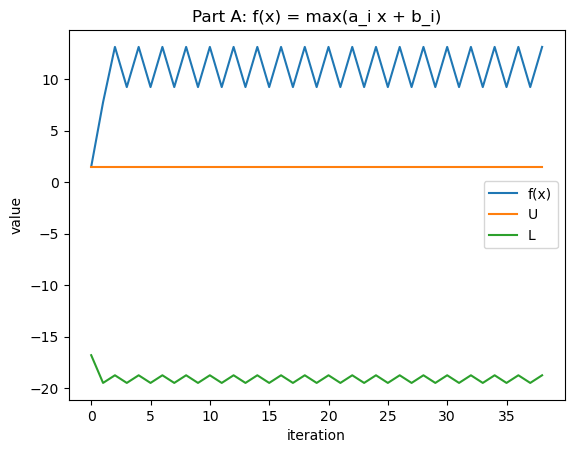

In [4]:
fig, ax = plt.subplots()
ax.plot(f, label='f(x)')
ax.plot(U, label='U')
ax.plot(L, label='L')
ax.set(xlabel='iteration', 
       ylabel='value',
       title='Part A: f(x) = max(a_i x + b_i)')
ax.legend()

## Part B

In [5]:
c = np.random.uniform(-1,1,n)

In [6]:
def lp_B(x, c):
    n = len(x)
    y = cvx.Variable(n)
    g = 0.5 * (x-c)
    f = func_B(x, c)
    obj = cvx.Minimize(f + g.T @ (y - x))
    con = [cvx.norm_inf(y) <= 1]
    prob = cvx.Problem(obj, con)
    prob.solve(solver = cvx.ECOS)
    return y.value, obj.value

def func_B(x, c):
    return np.linalg.norm(x-c, 2)


iters = 40
eps = 1e-8
x = np.ndarray((iters,n))
f = np.full(iters, np.nan)
L = np.full(iters, np.nan)
U = np.full(iters, np.nan)
x[0,:] = np.zeros(n)

for idx in range(iters-1):
    f[idx] = func_B(x[idx,:], c) # func eval
    U[idx] = np.nanmin(f)   # upper bound
    x[idx+1,:], L[idx]= lp_B(x[idx,:], c)   # step + lower bound

    if U[idx] - L[idx] < eps:
        break

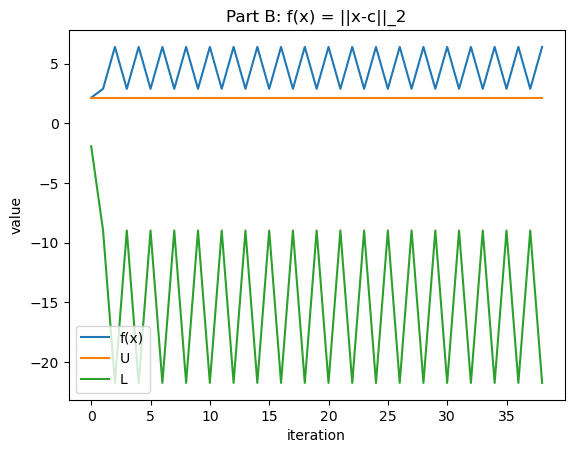

In [7]:
fig, ax = plt.subplots()
ax.plot(f, label='f(x)')
ax.plot(U, label='U')
ax.plot(L, label='L')
ax.set(xlabel='iteration', 
       ylabel='value',
       title='Part B: f(x) = ||x-c||_2')
ax.legend()